In [5]:


# Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import linregress
import hvplot.pandas
import plotly.express as px
import seaborn as sns

#Turning off warning
import warnings
warnings.filterwarnings("ignore")






In [7]:
# Store file path
csv_path="Resources/Netflix_titles.csv"

# Read the csv file
netflixdata_df = pd.read_csv(csv_path)

# Display Dataset
netflixdata_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
#Identifying number of rows and columns

netflixdata_df.shape

(8807, 12)

In [9]:
#List of the columns
netflixdata_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Identifying if any duplicate values

netflixdata_df.duplicated().sum()

0

In [11]:
#Identifying if any null values

netflixdata_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
# Breaking down the columns to collect unique values and/ or count 

# Breakdown of type of Netflix content
netflixdata_df["type"].unique()


array(['Movie', 'TV Show'], dtype=object)

In [13]:
# Breakdown of the ratings for the Netflix content

netflixdata_df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
# Breakdown of release year of the Netflix content

netflixdata_df['release_year'].unique()


array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [15]:
# Unique count of release year data 

netflixdata_df['release_year'].nunique()

74

In [16]:
# Count of the listed category

netflixdata_df['listed_in'].nunique()

514

In [17]:
#Count of movies vs shows

netflixdata_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

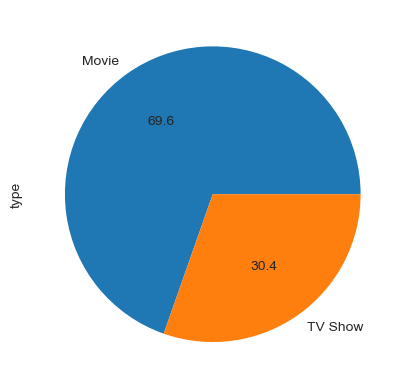

In [18]:
# Generating a pie graph for breakdown between Movies and TV Shows
netflixdata_df["type"].value_counts().plot(kind="pie",autopct="%.1f")

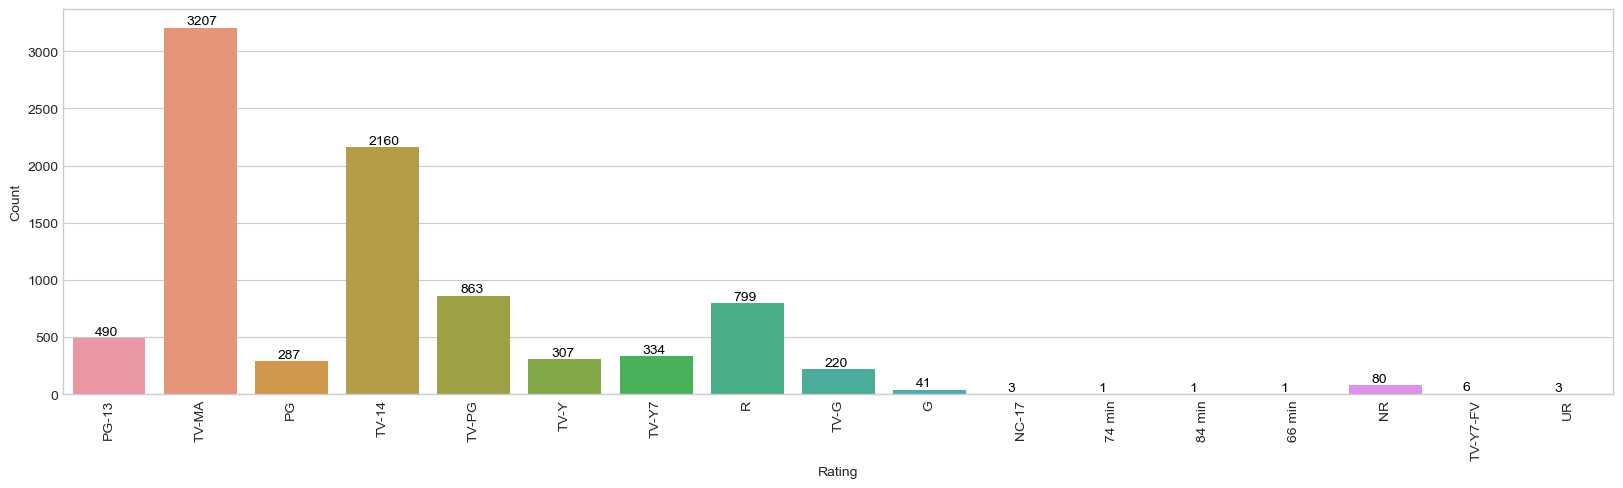

In [19]:
# Checking the count of rating for movies and tv shows in each category 

plt.figure(figsize=(20,5))
plt.style.use('seaborn-whitegrid')
ax=sns.countplot(x="rating",data=netflixdata_df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

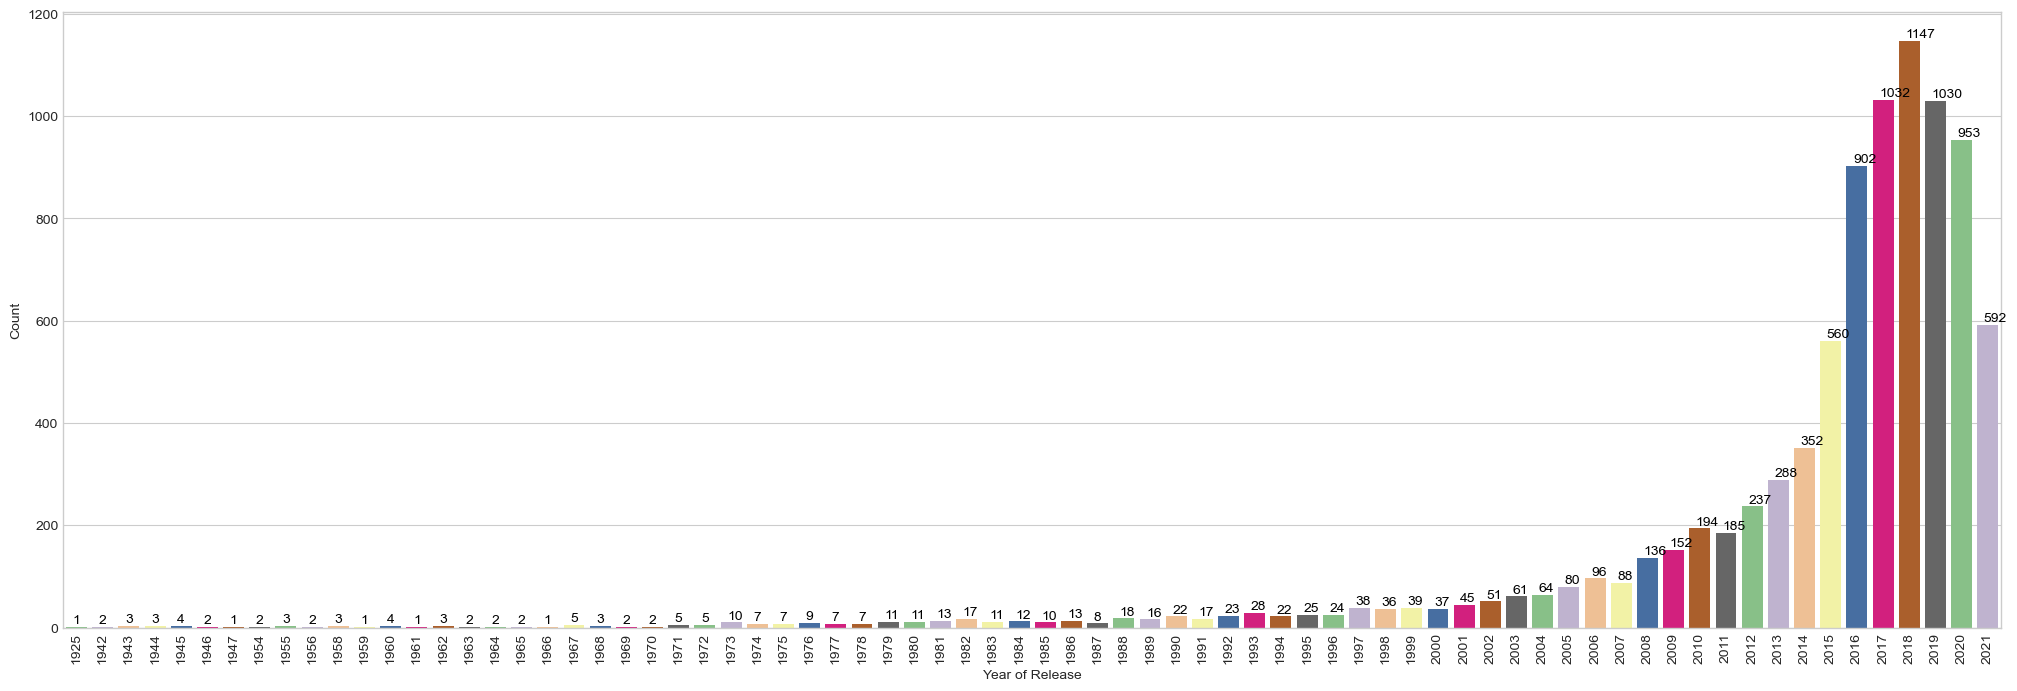

In [20]:
# Amount of movies and tv shows added each year


plt.figure(figsize=(25,8))
plt.style.use('seaborn-whitegrid')
ax=sns.countplot(x='release_year',data=netflixdata_df,palette="Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

<AxesSubplot:>

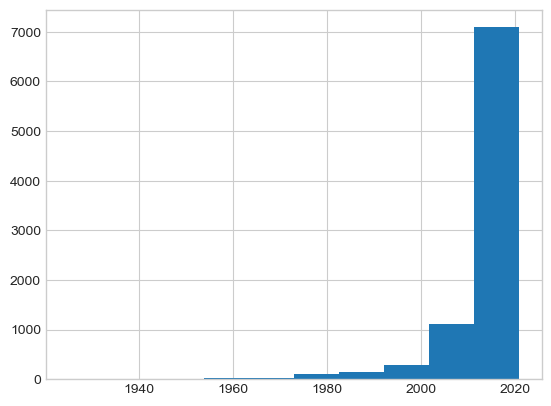

In [21]:
# Histogram depicting content released per year

netflixdata_df["release_year"].hist()


In [22]:
px.histogram(netflixdata_df,x="release_year",color="release_year")

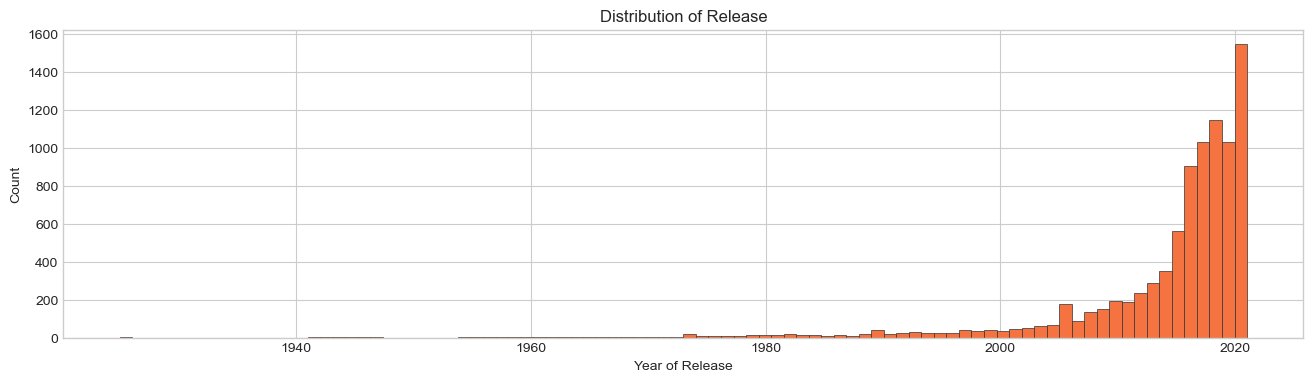

In [25]:
# Using matplotlib to plot histogram of movies and shows released each year

plt.figure(figsize=(16,4))
plt.style.use('seaborn-whitegrid')
plt.hist(netflixdata_df['release_year'],bins=90,facecolor = '#F47340', edgecolor='#323232', linewidth=0.5)
plt.title('Distribution of Release')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.show()

In [26]:
netflixdata_df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [24]:
movies_only_in_canada=netflixdata_df[(netflixdata_df['type']=='Movie')&(netflixdata_df['country']=='Canada')]['title']

movies_only_in_canada.count()

122

In [27]:
movies_only_in_canada.unique()

array(['Level 16', 'Red Snow', 'The Yeti Adventures',
       'Made You Look: A True Story About Fake Art',
       'The Magic School Bus Rides Again In the Zone', 'Braven',
       'Grizzlies', 'Mighty Express: A Mighty Christmas',
       'The Christmas Chronicles: Part Two', 'Hometown Holiday',
       'Midnight at the Magnolia', 'A Christmas Catch',
       'Christmas with a Prince', 'Elliot the Littlest Reindeer',
       'The Magic School Bus Rides Again The Frizz Connection',
       'Super Monsters: Dia de los Monsters', 'StarBeam: Halloween Hero',
       "Best Wishes, Warmest Regards: A Schitt's Creek Farewell",
       'True: Friendship Day', 'Fearless',
       'Super Monsters: The New Class', 'What Keeps You Alive',
       'David Foster: Off the Record', 'True: Rainbow Rescue', 'Code 8',
       'Indian Horse', 'The Decline', "There's Something in the Water",
       'True: Wuzzle Wegg Day', 'True: Grabbleapple Harvest',
       'Martin Matte: La vie, la mort...eh la la..!',
       'Tru